In [178]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
stmega = "1"
P12 = True
P34 = False
Full = P12 and P34

ll = open("LongLong","r")
if ll.mode == 'r':
    contents = ll.readlines()
ll.close()

if stmega != "-1":
    slD = open("slDirect,"+stmega,"r")
    if slD.mode == 'r':
        slconD = slD.readlines()
    slD.close()

    sl12 = open("slP12,"+stmega,"r")
    if sl12.mode == 'r':
        slcon12 = sl12.readlines()
    sl12.close()

    sl34 = open("slP34,"+stmega,"r")
    if sl34.mode == 'r':
        slcon34 = sl34.readlines()
    sl34.close()

    sl1234 = open("slP1234,"+stmega,"r")
    if sl1234.mode == 'r':
        slcon1234 = sl1234.readlines()
    sl1234.close()

    shortshort = open("ssDirect,"+stmega,"r")
    if shortshort.mode == 'r':
        ssconD = shortshort.readlines()
    shortshort.close()

    shortshort = open("ssP12,"+stmega,"r")
    if shortshort.mode == 'r':
        sscon12 = shortshort.readlines()
    shortshort.close()

    shortshort = open("ssP34,"+stmega,"r")
    if shortshort.mode == 'r':
        sscon34 = shortshort.readlines()
    shortshort.close()

    shortshort = open("ssP12P34,"+stmega,"r")
    if shortshort.mode == 'r':
        sscon1234 = shortshort.readlines()
    shortshort.close()

In [179]:
kk = []
sls = []
cls = []
clc = []
slc = []
pls = []
plc = []
for i in range(len(contents)):
    temp = contents[i].split()
    if temp[0] == 'Kappa':
        kk.append(float(temp[-1]))
    if temp[0] == 'sls:':
        sls.append(float(temp[-1]))
    if temp[0] == 'cls:':
        cls.append(float(temp[-1]))
    if temp[0] == 'clc:':
        clc.append(float(temp[-1]))
    if temp[0] == 'slc:':
        slc.append(float(temp[-1]))

if stmega != "-1":
    for i in range(len(slconD)):
        tempD = slconD[i].split()
        temp12 = slcon12[i].split()
        temp34 = slcon34[i].split()
        temp1234 = slcon1234[i].split()
        if i == 0:
            mega = int(tempD[0])
            nt = int(tempD[1])
        else:
            if P12 and not Full:
                #P12 Exchange
                pls.append([int(tempD[1]),2*(float(tempD[2])+float(temp12[2]))])
                plc.append([int(tempD[1]),2*(float(tempD[3])+float(temp12[3]))])
                #print("HELLO")
            elif P34 and not Full:
                #P34 Exchange
                pls.append([int(tempD[1]),2*(float(tempD[2])+float(temp34[2]))])
                plc.append([int(tempD[1]),2*(float(tempD[3])+float(temp34[3]))])
                #print("ERROR")
            elif Full:
                #All Exchange
                pls.append([int(tempD[1]),2*(float(tempD[2])+float(temp12[2])+float(temp34[2])+float(temp1234[2]))])
                plc.append([int(tempD[1]),2*(float(tempD[3])+float(temp12[3])+float(temp34[3])+float(temp1234[3]))])
                #print("ERROR2")
            
    php = np.zeros([nt,nt])
    pp = np.zeros([nt,nt])
    for i in range(len(ssconD)):
        tempD = ssconD[i].split()
        temp12 = sscon12[i].split()
        temp34 = sscon34[i].split()
        temp1234 = sscon1234[i].split()
        if i == 0 and mega != int(tempD[0]):
            print('MEGA DOESNT MATCH')
        if i == 1 and nt != int(tempD[0]):
            print('NT DOESNT MATCH')
        if i != 0 and i != 1:
            ie = int(tempD[0])-1
            je = int(tempD[1])-1
            if P12 and not Full:
                #P12 Exchange
                pp[ie,je] = 2*(float(tempD[2])+float(temp12[2]))
                php[ie,je] = 2*(float(tempD[3])+float(temp12[3]))
            elif P34 and not Full:
                #P34 Exchange
                pp[ie,je] = 2*(float(tempD[2])+float(temp34[2]))
                php[ie,je] = 2*(float(tempD[3])+float(temp34[3]))
            elif Full:
                #All Exchange
                pp[ie,je] = 4*(float(tempD[2])+float(temp12[2])+float(temp34[2])+float(temp1234[2]))
                php[ie,je] = 4*(float(tempD[3])+float(temp12[3])+float(temp34[3])+float(temp1234[3]))
            #print(ie,je,pp[ie,je],php[ie,je])

In [180]:
print('   kk   ','   sls   ','   cls   ','   clc   ','   slc   ')
for i in range(len(kk)):
    print('{:2f}'.format(kk[i]),'{:2f}'.format(sls[i]),'{:2f}'.format(cls[i]),'{:2f}'.format(clc[i]),'{:2f}'.format(slc[i]))

if stmega != "-1":
    print('')
    print('   kk   ','i','    pls   ','    plc   ')
    for i in range(len(kk)):
        for ie in range(nt):
            print('{:2f}'.format(kk[i]),pls[i*nt+ie][0],'{:2f}'.format(pls[i*nt+ie][1]),'{:2f}'.format(plc[i*nt+ie][1]))
    
    print()
    print('i','j','      pp      ','      php      ')
    for i in range(nt):
        for j in range(nt):
            print(i+1,j+1,pp[i,j],php[i,j])

   kk       sls       cls       clc       slc   
0.050000 -1.706207 -6.635390 2.602486 -2.631804
0.100000 -3.257272 -5.965282 3.377021 -1.961679
0.150000 -4.521863 -4.938104 4.272035 -0.934480
0.200000 -5.410695 -3.670287 4.928973 0.333354
0.250000 -5.885451 -2.293857 5.261821 1.709785
0.300000 -5.957512 -0.935524 5.267662 3.068096
0.350000 -5.678380 0.299929 4.990268 4.303498
0.400000 -5.125346 1.339371 4.499462 5.342856
0.450000 -4.386307 2.143799 3.874394 6.147170
0.500000 -3.546774 2.704965 3.190528 6.708196
0.550000 -2.680777 3.038413 2.511067 7.041483
0.600000 -1.846013 3.175218 1.882769 7.178113

   kk    i     pls        plc   
0.050000 1 -11.409139 235.415349
0.050000 2 -216.316705 -217.623430
0.050000 3 55.872425 1144.554789
0.050000 4 -62.072406 868.452894
0.050000 5 37.968025 1104.356554
0.050000 6 -71.753101 870.406756
0.050000 7 -54.268979 641.028738
0.100000 1 -15.814442 174.856955
0.100000 2 -299.422610 -97.669664
0.100000 3 77.735491 818.921317
0.100000 4 -84.586600 65

In [181]:
def matcreate(cls,pls,clc,plc,pp,php,kk,ki,N):
    B = np.zeros([nt+1])
    A = np.zeros([nt+1,nt+1])
    k = kk[ki]
    for i in range(nt+1):
        if i == 0:
            B[i] = -(cls[ki]+1.)
        else:
            temps = pls[nt*ki+i-1]
            B[i] = -temps[1]
        for j in range(nt+1):
            if i == 0 and j == 0:
                A[i,j] = clc[ki]
            elif i == 0 or j == 0 and j>i:
                tempc = plc[ki*nt+j-1]
                A[i,j] = tempc[1]
            elif i == 0 or j == 0 and j<i:
                tempc = plc[ki*nt+i-1]
                A[i,j] = tempc[1]
            else:
                A[i,j] = 2*(php[i-1,j-1]-(-0.25-0.25+0.5*k**2.0)*pp[i-1,j-1])
    #print(A)
    #print("-------------------------------------")
    #print(B)
    #print("*************************************")
    return A,B

In [182]:
phase = []
phasef = []
if stmega != "-1":
    for i in range(len(kk)):
        A,B = matcreate(cls,pls,clc,plc,pp,php,kk,i,nt)
        A = np.array(A)
        B = np.array(B)
        #for A0 in A:
        #    print(' '.join(['%.3e'%a for a in A0]))
        #print('---------------------------------------------------------')
        #print(' '.join(['%.3e'%b for b in B]))
        #print('*********************************************************')
        X = lin.solve(A,B)
        #print(A.dot(X)-B)
        phase.append(X[0])
        ci = []
        plssum = 0.0
        for j in range(len(X)-1):
            ci.append(X[j+1])
            temps = pls[j]
            plssum += ci[j]*temps[1]
        phasef.append(-0.5*phase[i]-0.5*(sls[i]+phase[i]*cls[i]+plssum))
        print(phasef[i])
        phasef[i] = np.arctan(phasef[i])
else:
    for i in range(len(kk)):
        phase.append(-(cls[i]+1)/clc[i])
        phasef.append(-0.5*phase[i]-0.5*(sls[i]+phase[i]*cls[i]))
        phasef[i] = np.arctan(phasef[i])

-1.0602887903917386
-2.921824522374626
-16.32233738911902
8.464006070575973
4.500420124078711
4.955838197195508
-3.8594537652331056
0.03409439348754084
0.4514177811749465
0.6086486370292956
0.7572424274479044
1.026567189691203


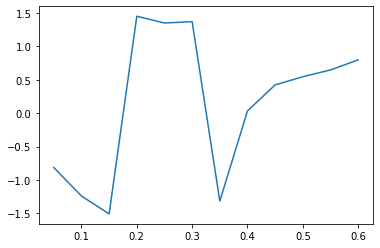

In [183]:
plt.plot(kk,phasef)
plt.show()

In [184]:
for i in range(len(phasef)):
    print('{:2f}'.format(kk[i]),'{:2f}'.format(phasef[i]))
    
for i in range(len(phasef)):
    print('{:2f}'.format(phasef[i]))

0.050000 -0.814652
0.100000 -1.241041
0.150000 -1.509607
0.200000 1.453194
0.250000 1.352147
0.300000 1.371688
0.350000 -1.317268
0.400000 0.034081
0.450000 0.424032
0.500000 0.546755
0.550000 0.648120
0.600000 0.798507
-0.814652
-1.241041
-1.509607
1.453194
1.352147
1.371688
-1.317268
0.034081
0.424032
0.546755
0.648120
0.798507
